# MNIST数据集使用LeNet进行图像分类
本示例教程演示如何在MNIST数据集上用LeNet进行图像分类。
手写数字的MNIST数据集，包含60,000个用于训练的示例和10,000个用于测试的示例。这些数字已经过尺寸标准化并位于图像中心，图像是固定大小(28x28像素)，其值为0到1。该数据集的官方地址为：http://yann.lecun.com/exdb/mnist/

# 环境
本教程基于paddle-develop编写，如果您的环境不是本版本，请先安装paddle-develop版本。

In [24]:
import paddle
print(paddle.__version__)
paddle.disable_static()

0.0.0


# 加载数据集
我们使用飞桨自带的paddle.dataset完成mnist数据集的加载。

In [9]:
print('download training data and load training data')
train_dataset = paddle.vision.datasets.MNIST(mode='train')
test_dataset = paddle.vision.datasets.MNIST(mode='test')
print('load finished')

download training data and load training data
load finished


取训练集中的一条数据看一下。

train_data0 label is: [5]


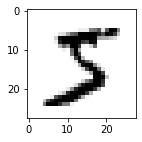

In [10]:
import numpy as np
import matplotlib.pyplot as plt
train_data0, train_label_0 = train_dataset[0][0],train_dataset[0][1]
train_data0 = train_data0.reshape([28,28])
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
print('train_data0 label is: ' + str(train_label_0))

# 2.组网
用paddle.nn下的API，如`Conv2d`、`Pool2D`、`Linead`完成LeNet的构建。

In [19]:
import paddle
import paddle.nn.functional as F
class LeNet(paddle.nn.Layer):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = paddle.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.max_pool1 = paddle.nn.Pool2D(pool_size=2, pool_type='max', pool_stride=2)
        self.conv2 = paddle.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.max_pool2 = paddle.nn.Pool2D(pool_size=2, pool_type='max', pool_stride=2)
        self.linear1 = paddle.nn.Linear(in_features=16*5*5, out_features=120)
        self.linear2 = paddle.nn.Linear(in_features=120, out_features=84)
        self.linear3 = paddle.nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.max_pool2(x)
        x = paddle.reshape(x, shape=[-1, 16*5*5])
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.softmax(x)
        return x

## 训练方式一
通过`Model` 构建实例，快速完成模型训练

In [21]:
import paddle
from paddle.static import InputSpec
from paddle.metric import Accuracy
inputs = InputSpec([None, 784], 'float32', 'x')
labels = InputSpec([None, 10], 'float32', 'x')
model = paddle.hapi.Model(LeNet(), inputs, labels)
optim = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())


model.prepare(
    optim,
    paddle.nn.loss.CrossEntropyLoss(),
    Accuracy(topk=(1, 2))
    )

### 使用model.fit来训练模型

In [22]:
model.fit(train_dataset,
        test_dataset,
        epochs=2,
        batch_size=64,
        save_dir='mnist_checkpoint')

Epoch 1/2
step  10/938 - loss: 2.2369 - acc_top1: 0.3281 - acc_top2: 0.4172 - 18ms/step


/Library/Python/3.7/site-packages/paddle/fluid/layers/utils.py:76: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(seq, collections.Sequence) and


step  20/938 - loss: 2.0185 - acc_top1: 0.3656 - acc_top2: 0.4328 - 17ms/step
step  30/938 - loss: 1.9579 - acc_top1: 0.4120 - acc_top2: 0.4969 - 16ms/step
step  40/938 - loss: 1.8549 - acc_top1: 0.4602 - acc_top2: 0.5500 - 16ms/step
step  50/938 - loss: 1.8628 - acc_top1: 0.5097 - acc_top2: 0.6028 - 16ms/step
step  60/938 - loss: 1.7139 - acc_top1: 0.5456 - acc_top2: 0.6409 - 16ms/step
step  70/938 - loss: 1.7296 - acc_top1: 0.5795 - acc_top2: 0.6719 - 15ms/step
step  80/938 - loss: 1.6302 - acc_top1: 0.6053 - acc_top2: 0.6949 - 15ms/step
step  90/938 - loss: 1.6688 - acc_top1: 0.6290 - acc_top2: 0.7158 - 15ms/step
step 100/938 - loss: 1.6401 - acc_top1: 0.6491 - acc_top2: 0.7327 - 15ms/step
step 110/938 - loss: 1.6357 - acc_top1: 0.6636 - acc_top2: 0.7440 - 15ms/step
step 120/938 - loss: 1.6309 - acc_top1: 0.6767 - acc_top2: 0.7539 - 15ms/step
step 130/938 - loss: 1.6445 - acc_top1: 0.6894 - acc_top2: 0.7638 - 15ms/step
step 140/938 - loss: 1.5961 - acc_top1: 0.7002 - acc_top2: 0.772

step 120/157 - loss: 1.6012 - acc_top1: 0.8824 - acc_top2: 0.9003 - 5ms/step
step 130/157 - loss: 1.5378 - acc_top1: 0.8844 - acc_top2: 0.9017 - 5ms/step
step 140/157 - loss: 1.5068 - acc_top1: 0.8858 - acc_top2: 0.9022 - 5ms/step
step 150/157 - loss: 1.5424 - acc_top1: 0.8873 - acc_top2: 0.9029 - 5ms/step
step 157/157 - loss: 1.5862 - acc_top1: 0.8872 - acc_top2: 0.9035 - 5ms/step
Eval samples: 10000
Epoch 2/2
step  10/938 - loss: 1.5988 - acc_top1: 0.8859 - acc_top2: 0.9016 - 15ms/step
step  20/938 - loss: 1.5702 - acc_top1: 0.8852 - acc_top2: 0.9047 - 15ms/step
step  30/938 - loss: 1.5999 - acc_top1: 0.8833 - acc_top2: 0.9021 - 15ms/step
step  40/938 - loss: 1.5652 - acc_top1: 0.8816 - acc_top2: 0.9000 - 15ms/step
step  50/938 - loss: 1.6163 - acc_top1: 0.8853 - acc_top2: 0.9047 - 15ms/step
step  60/938 - loss: 1.5307 - acc_top1: 0.8849 - acc_top2: 0.9049 - 15ms/step
step  70/938 - loss: 1.5542 - acc_top1: 0.8846 - acc_top2: 0.9029 - 15ms/step
step  80/938 - loss: 1.5694 - acc_top1:

step  60/157 - loss: 1.5646 - acc_top1: 0.9641 - acc_top2: 0.9906 - 5ms/step
step  70/157 - loss: 1.5167 - acc_top1: 0.9618 - acc_top2: 0.9900 - 5ms/step
step  80/157 - loss: 1.4728 - acc_top1: 0.9635 - acc_top2: 0.9906 - 5ms/step
step  90/157 - loss: 1.5030 - acc_top1: 0.9668 - acc_top2: 0.9917 - 5ms/step
step 100/157 - loss: 1.4612 - acc_top1: 0.9677 - acc_top2: 0.9914 - 5ms/step
step 110/157 - loss: 1.4612 - acc_top1: 0.9689 - acc_top2: 0.9913 - 5ms/step
step 120/157 - loss: 1.4612 - acc_top1: 0.9707 - acc_top2: 0.9919 - 5ms/step
step 130/157 - loss: 1.4621 - acc_top1: 0.9719 - acc_top2: 0.9923 - 5ms/step
step 140/157 - loss: 1.4612 - acc_top1: 0.9734 - acc_top2: 0.9929 - 5ms/step
step 150/157 - loss: 1.4660 - acc_top1: 0.9748 - acc_top2: 0.9933 - 5ms/step
step 157/157 - loss: 1.5215 - acc_top1: 0.9731 - acc_top2: 0.9930 - 5ms/step
Eval samples: 10000
save checkpoint at /Users/chenlong/online_repo/book/paddle2.0_docs/image_classification/mnist_checkpoint/final


### 训练方式1结束
以上就是训练方式1，可以非常快速的完成网络模型训练。此外，paddle还可以用下面的方式来完成模型的训练。

# 3.训练方式2
方式1可以快速便捷的完成训练，隐藏了训练时的细节。而方式2则可以用最基本的方式，完成模型的训练。具体如下。

In [23]:
import paddle
train_loader = paddle.io.DataLoader(train_dataset, places=paddle.CPUPlace(), batch_size=64)
def train(model):
    model.train()
    epochs = 2
    batch_size = 64
    optim = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
    for epoch in range(epochs):
        for batch_id, data in enumerate(train_loader()):
            x_data = data[0]
            y_data = data[1]
            predicts = model(x_data)
            loss = paddle.nn.functional.cross_entropy(predicts, y_data)
            acc = paddle.metric.accuracy(predicts, y_data, k=2)
            avg_loss = paddle.mean(loss)
            avg_acc = paddle.mean(acc)
            avg_loss.backward()
            if batch_id % 100 == 0:
                print("epoch: {}, batch_id: {}, loss is: {}, acc is: {}".format(epoch, batch_id, avg_loss.numpy(), avg_acc.numpy()))
            optim.minimize(avg_loss)
            model.clear_gradients()
model = LeNet()
train(model)

epoch: 0, batch_id: 0, loss is: [2.300888], acc is: [0.28125]
epoch: 0, batch_id: 100, loss is: [1.6948285], acc is: [0.8125]
epoch: 0, batch_id: 200, loss is: [1.5282547], acc is: [0.96875]
epoch: 0, batch_id: 300, loss is: [1.509404], acc is: [0.96875]
epoch: 0, batch_id: 400, loss is: [1.4973292], acc is: [1.]
epoch: 0, batch_id: 500, loss is: [1.5063374], acc is: [0.984375]
epoch: 0, batch_id: 600, loss is: [1.490077], acc is: [0.984375]
epoch: 0, batch_id: 700, loss is: [1.5206413], acc is: [0.984375]
epoch: 0, batch_id: 800, loss is: [1.5104291], acc is: [1.]
epoch: 0, batch_id: 900, loss is: [1.5216607], acc is: [0.96875]
epoch: 1, batch_id: 0, loss is: [1.4949667], acc is: [0.984375]
epoch: 1, batch_id: 100, loss is: [1.4923338], acc is: [0.96875]
epoch: 1, batch_id: 200, loss is: [1.5026703], acc is: [1.]
epoch: 1, batch_id: 300, loss is: [1.4965419], acc is: [0.984375]
epoch: 1, batch_id: 400, loss is: [1.5270758], acc is: [1.]
epoch: 1, batch_id: 500, loss is: [1.4774603], a

### 对模型进行验证

In [46]:
import paddle
test_loader = paddle.io.DataLoader(test_dataset, places=paddle.CPUPlace(), batch_size=64)
def test(model):
    model.eval()
    batch_size = 64
    for batch_id, data in enumerate(train_loader()):
        x_data = data[0]
        y_data = data[1]
        predicts = model(x_data)
        loss = paddle.nn.functional.cross_entropy(predicts, y_data)
        acc = paddle.metric.accuracy(predicts, y_data, k=2)
        avg_loss = paddle.mean(loss)
        avg_acc = paddle.mean(acc)
        avg_loss.backward()
        if batch_id % 100 == 0:
            print("batch_id: {}, loss is: {}, acc is: {}".format(batch_id, avg_loss.numpy(), avg_acc.numpy()))
test(model)

batch_id: 0, loss is: [1.5017498], acc is: [1.]
batch_id: 100, loss is: [1.4783669], acc is: [0.984375]
batch_id: 200, loss is: [1.4958509], acc is: [1.]
batch_id: 300, loss is: [1.4924574], acc is: [1.]
batch_id: 400, loss is: [1.4762049], acc is: [1.]
batch_id: 500, loss is: [1.4817208], acc is: [0.984375]
batch_id: 600, loss is: [1.4763825], acc is: [0.984375]
batch_id: 700, loss is: [1.4954926], acc is: [1.]
batch_id: 800, loss is: [1.5220823], acc is: [0.984375]
batch_id: 900, loss is: [1.4945463], acc is: [0.984375]


### 训练方式2结束
以上就是训练方式2，通过这种方式，可以清楚的看到训练和测试中的每一步过程。

## 总结


以上就是用LeNet对手写数字数据及MNIST进行分类。本示例提供了两种训练模型的方式，一种可以快速完成模型的组建与预测，非常适合新手用户上手。另一种则需要多个步骤来完成模型的训练，适合进阶用户使用。